In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

In [12]:
df = pd.read_csv('../Linear Regression/DATA/spam.csv',encoding='ISO-8859-1')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [13]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df.columns = ['label' , 'data']
df['b_label'] = df['label'].map({'ham' : 0 , 'spam' : 1})
df.head(5)

,label,data,b_label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [17]:
tfdif = TfidfVectorizer(decode_error='ignore')
X = tfdif.fit_transform(df['data'])

<1x8672 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [22]:
y=df['b_label']
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size=0.33 , random_state=101)
model = SVC(kernel='linear' , C=2)
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
print(model.score(x_test , y_test))

0.9858618814573138


In [24]:
from sklearn.metrics import accuracy_score , confusion_matrix  , classification_report
print(confusion_matrix(y_test , y_pred))
print(accuracy_score(y_test , y_pred))
print(classification_report(y_test , y_pred))

[[1607    2]
 [  24  206]]
0.9858618814573138
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1609
           1       0.99      0.90      0.94       230

    accuracy                           0.99      1839
   macro avg       0.99      0.95      0.97      1839
weighted avg       0.99      0.99      0.99      1839



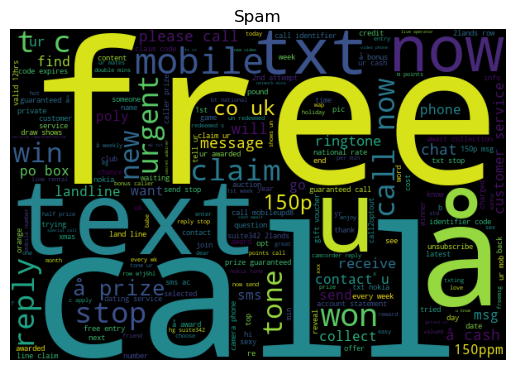

In [25]:
words = ''
for msg in df[df['label'] == 'spam']['data'] :
    msg = msg.lower()
    words += msg + ' '
wordcloud = WordCloud(width=600 , height=400).generate(words)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Spam')
plt.show()

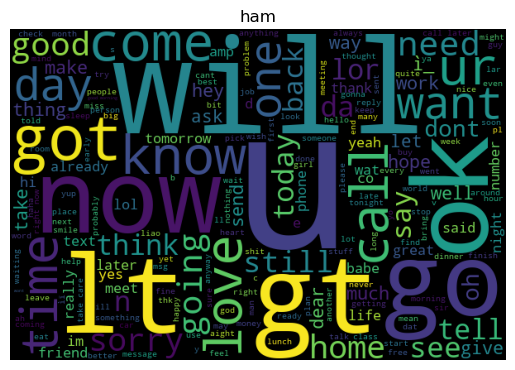

In [27]:
words = ''
for msg in df[df['label'] == 'ham']['data'] :
    msg = msg.lower()
    words += msg + ' '
wordcloud = WordCloud(width=600 , height=400).generate(words)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('ham')
plt.show()